# See prev chapter [What_are_state_and_action_values](Sutton_P1_Ch03_What_are_state_and_action_values.ipynb)

# Policy iteration method

This method continuously improves policy via Bellman's equation turned into 'assignment' task.


Lets see how.

We know that with any given initial policy $\pi_0(a|s)$ we can associate state values $v_{\pi_0}(s)$:

## Direct policy evaluation
*   One way of determining $v_{\pi_0}(s)$ is to solve system of $|S|$ linear equations.

    In simple terms, you can say that value $v(s_i)$ is formed from instantaneous reward $r(s_i)$ and expected rewards from all possible transition  for all states $s_i$
    $$
    \begin{cases}
    v(s_0) = r(s_0) + \gamma \underset{s^\prime \in S}{\sum} p(s^\prime | s_0, a = \pi(s_0)) \cdot v(s^\prime)\\
    v(s_1) = r(s_1) + \gamma \underset{s^\prime \in S}{\sum} p(s^\prime | s_1, a = \pi(s_1)) \cdot v(s^\prime)\\
    \dots\\
    v(s_n) = r(s_n) + \gamma \underset{s^\prime \in S}{\sum} p(s^\prime | s_n, a = \pi(s_n)) \cdot v(s^\prime)
    \end{cases}$$

    Which you can rewrite as matrix equation

    $$V = (I-\gamma P)^{-1}R$$

***

## Iterative Policy Evaluation
*   Alternatively, we can do it iteratively, by 'guessing' values states starting from $v_{\pi_0}(s)$ 

    This method is called <b>Iterative Policy Evaluation</b>

    Expressed in terms of expected rewards (Bellman's equation) we formulate update loop as
    $$v_{\pi_0}^{k+1}(s) = \sum_a \pi(a|s) \sum_{r \in R} \sum_{s^\prime \in S} p(s^\prime, r|s,a) \cdot \biggl[ r + \gamma \cdot v_{\pi_0}^{k}(s^\prime)\biggr]$$
    In fact, known immediate rewards guide this iterative process to the true value $$\underset{k\to \infty}{\lim} v_{\pi_0}^{k}(s) = v_{\pi_0, True}(s)$$

<i>We will define these in an easier to understand form later in text</i>
***


## Policy improvement
Even if policy $v_{\pi_0}(s)$ is sub-optimal, its value states show approximate regions in state-space where you can get good rewards.

<b>Policy improvement</b> extracts better performing actions (thus policy $\pi_1(s)$) from given state values $v_{\pi_0}(s)$.

$$\pi^\prime(s) = \underset{a}{\mathrm{argmax}} \sum_{r \in R} \sum_{s^\prime \in S} p(s^\prime, r|s,a) \cdot \biggl[ r + \gamma \cdot v_{\pi}(s^\prime)\biggr]$$
When policy is changed to $\pi_1(s)$, it invalidates value states $v_{\pi_0}(s)$, so these have to be recalculated.

## Policy Iteration

<b>Policy Iteration</b> repeatedly perform policy evaluation $E$, followed by policy improvement $I$. 

$$\pi_0 \overset{E}{\rightarrow} v_{\pi_0}  \overset{I}{\rightarrow} \pi_1 \overset{E}{\rightarrow} v_{\pi_1}  \overset{I}{\rightarrow}  \dots \overset{I}{\rightarrow}  \pi_\ast \overset{E}{\rightarrow} v_{\ast}$$
This leads to optimal policy and associated value states.

Algorithm:

<img    src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*A1WWiVls4dS5tpb7bDMCGg.png" 
        alt="image info" 
        style="background-color:white;padding:5px;" 
        width="300" 
         />

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from misc_tools.print_latex import print_tex

input example : 
>>> arr_T = np.array([[r'\vec{v}_1', r'\vec{v}_2']]).T
>>> print_tex(arr_T,'=', np.arange(1,5).reshape(2,-1)/4, r'; symbols: \otimes, \cdot,\times')
output: 


<IPython.core.display.Math object>

## Stochastic Frozen Lake environment

*   Any actions result in transitions to any tangential state with equal state

    Later we can observe how this leads to weird but optimal choices for actions

In [2]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True,render_mode="ansi")#,render_mode="human"
env.reset()
#env.close()
def p_sp_sa(state, action):
    1
print(env.render())
rewards = np.array(env.reward_range)# [0,1]
num_states= env.observation_space.n
num_actions = env.action_space.n
where_holes = np.argwhere(env.unwrapped.desc.flatten() == b'H').flatten()
where_goals = np.argwhere(env.unwrapped.desc.flatten() == b'G').flatten()
where_start = np.argwhere(env.unwrapped.desc.flatten() == b'S').flatten()


SFFF
FHFH
FFFH
HFFG



In [3]:
gamma = 0.9
policy_init = np.ones((num_states, num_actions))/num_actions
v_pi_init = np.zeros((num_states,))
p_spr_sa = np.zeros((num_states,  num_actions, num_states, rewards.size))
for state, actions_d in env.P.items():
    for action, transitions in actions_d.items():
        for (p, state_tar, reward, is_terminal) in transitions:
            p_spr_sa[state, action, state_tar, int(reward)] += p   
            # apparently walls actions transition to same state = different actions to same state. so += p
print(f'(s\', a) normalized: {np.all(p_spr_sa.sum(axis=(-2,-1)) == 1)}')

(s', a) normalized: True


from [RL_Reinforced_Learning/Meaning_of_Psasr_probability_matrix.ipynb](data_processing/neural_networks/RL_Reinforced_Learning/Meaning_of_Psasr_probability_matrix.ipynb)
$$\boxed{r(s,a,s^\prime) = \frac{\sum_r  r\cdot p(s^\prime,r|s,a)}{p(s^\prime|s,a)}; \ 
p(s^\prime|s,a) = \sum_r p(s^\prime,r|s,a)}$$
We can redefine $q_{\pi}(s,a)$ in terms of expected rewards and transition probabilities to states $s^\prime$:
$$q_{\pi}(s,a) = \sum_{r \in R} \sum_{s^\prime \in S} p(s^\prime, r|s,a) \cdot \biggl[ r + \gamma \cdot v_{\pi}(s^\prime)\biggr]=  \sum_{s^\prime \in S} \left[\sum_{r \in R} p(s^\prime, r|s,a) \cdot r + \gamma \sum_{r \in R} p(s^\prime, r|s,a) \cdot v_{\pi}(s^\prime)\right] = $$
$$ = \sum_{s^\prime \in S} \left[p(s^\prime|s,a)\cdot r(s,a,s^\prime) + \gamma \cdot v_{\pi}(s^\prime) \cdot \sum_{r \in R} p(s^\prime, r|s,a) \right]= \sum_{s^\prime \in S} \biggl[  p(s^\prime|s,a)\cdot r(s,a,s^\prime) + \gamma \cdot v_{\pi}(s^\prime) \cdot p(s^\prime|s,a) \biggr] =$$ 
$$= \sum_{s^\prime \in S} p(s^\prime|s,a)\cdot\biggl[r(s,a,s^\prime) + \gamma \cdot v_{\pi}(s^\prime)\biggr]$$

$$\boxed{q_{\pi}(s,a)  = \sum_{s^\prime \in S} p(s^\prime|s,a)\cdot\biggl[r(s,a,s^\prime) + \gamma \cdot v_{\pi}(s^\prime)\biggr]}$$

In [4]:
p_sp_sa = p_spr_sa.sum(-1)
r_sas_top = p_spr_sa @ rewards
r_sas = np.divide(r_sas_top, p_sp_sa, out = np.zeros_like(r_sas_top), where= (p_sp_sa != 0))

def get_q_sa(state_value):
   return (p_sp_sa * (r_sas + gamma*state_value)).sum(-1)


## Classic policy evaluation (Expected reward)
$$v_{\pi}(s) = \sum_{a \in A} \pi(a|s) \sum_{r \in R} \sum_{s^\prime \in S} p(s^\prime, r|s,a) [ r + \gamma v_{\pi}(s^\prime)] = \sum_{a \in A} \pi(a|s) \cdot q_{\pi}(s,a) $$

In [5]:
def evaluate_policy(state_action_value, policy):
   v_pi = (policy * state_action_value).sum(-1)
   return v_pi

## Greedy policy improvement
$$\pi(s) = \underset{a}{\mathrm{argmax}} \sum_{r \in R} \sum_{s^\prime \in S} p(s^\prime, r|s,a) [ r + \gamma v_{\pi}(s^\prime)] = \underset{a}{\mathrm{argmax}} \ q_{\pi}(s,a) $$
Can do $\pi(a|s)$ for action-states with same value ([as here](https://aleksandarhaber.com/policy-iteration-algorithm-in-python-and-tests-with-frozen-lake-openai-gym-environment-reinforcement-learning-tutorial/))

In [6]:
def evaluate_policy_k(state_value, policy, num_iters_max = 50, eps = 1e-6):
   v_pi = state_value.copy()
   for k in range(num_iters_max):
      v_pi_old = v_pi.copy()
      q_pi     = get_q_sa(v_pi)
      v_pi     = evaluate_policy(q_pi, policy)
      if np.max(np.abs(v_pi-v_pi_old)) < eps:
         print(f'Policy eval: early break at iter: {k}')
         break
         
   q_pi  = get_q_sa(v_pi)
   return v_pi, q_pi

def improve_policy(state_action_value):
   # ChatGPT +  modified. Multiple maxes
   a = state_action_value
   max_values = np.max(a, axis=-1)
   max_indices = [np.where(a[i] == max_values[i])[0] for i in range(a.shape[0])]

   one_hot_matrix = np.zeros_like(a)

   for i, indices in enumerate(max_indices):
      one_hot_matrix[i, indices] = 1/len(indices)
   max_indices,one_hot_matrix

   return one_hot_matrix

# Policy iteration loop

In [7]:
v_pi  = v_pi_init.copy()
pi    = policy_init.copy()

for k in range(500):
   pi_old = pi.copy()
   v_pi, q_pi = evaluate_policy_k(v_pi, pi)
   pi = improve_policy(q_pi)
   if np.max(np.abs(pi-pi_old)) < 1e-5:
         print(f'Policy iter: early break at iter: {k}')
         break

Policy eval: early break at iter: 32
Policy iter: early break at iter: 1


In [8]:
a = np.array([[r'a']+['s_{'+ r'\cdot,'+str(i)+'}' for i in range(4)]]).T
b = np.array([['s_{'+str(i)+ r',\cdot'+'}' for i in range(4)]])
v_s = np.hstack([a, np.vstack([b, v_pi.reshape(4,4).round(2) ])])

a       = np.array([[r'\_']+[r'\leftarrow', r'\downarrow',r'\rightarrow', r'\uparrow']])
b       = np.array([['s_{'+str(i)+'}'  for i in range(num_states)]]).T
pi2      = np.vstack([a, np.hstack([b, pi.round(2) ])])

q_sa    = np.vstack([a, np.hstack([b, q_pi.round(2)])])

print_tex('q_\pi(s,a)=',q_sa, ';v_\pi(s) = ',v_s, ';\pi(a|s) = ', pi2)

<IPython.core.display.Math object>

## Plot policy
Notice how stochasticity impacts policy. 

Its less 'safe' to move between holes as this action will, with probability $p = \frac{2}{3}$, put you into any of these holes.

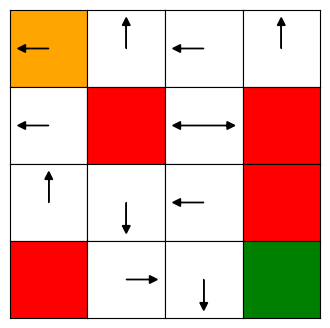

In [9]:
def plot_arrows_on_grid(A, N):
    # ChatGPT + modified
    fig, axes = plt.subplots(N, N, figsize=(4,4), sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0, hspace=0)
    axes = axes.flatten()
    for i,(ax,arrows) in enumerate(zip(axes,A)):
        if i in where_holes:
            ax.set_facecolor('red')
        elif i in where_goals:
            ax.set_facecolor('green')
        elif i in where_start:
            ax.set_facecolor('orange')
        if all(arrows): continue
        if arrows[0]:  # Left arrow
            ax.arrow(0.5, 0.5, -0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        if arrows[1]:  # Bottom arrow
            ax.arrow(0.5, 0.5, 0, -0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        if arrows[2]:  # Right arrow
            ax.arrow(0.5, 0.5, 0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        if arrows[3]:  # Top arrow
            ax.arrow(0.5, 0.5, 0, 0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
plot_arrows_on_grid(pi>0,4)

# Evaluate play
Code (modified) from
https://zoo.cs.yale.edu/classes/cs470/materials/hws/hw7/FrozenLake.html

In [10]:
def get_score(env, policy, episodes=10_000):
  misses = 0
  steps_list = []
  for episode in range(episodes):
    observation = env.reset()[0]
    steps=0
    while True:
      
      pi_as = policy[observation]
      action = np.random.choice(np.arange(num_actions),p=pi_as)
      observation, reward, done = env.step(action)[:3]
      steps+=1
      if done and reward == 1:
        # print('You have got the fucking Frisbee after {} steps'.format(steps))
        steps_list.append(steps)
        break
      elif done and reward == 0:
        # print("You fell in a hole!")
        misses += 1
        break
  print('----------------------------------------------')
  print('You took an average of {:.0f} steps to get the frisbee'.format(np.mean(steps_list)))
  print('And you fell in the hole {:.2f} % of the times'.format((misses/episodes) * 100))
  print('----------------------------------------------')

get_score(env, pi)

c:\Users\Hot Mexican\VS_Code_Proj\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


----------------------------------------------
You took an average of 43 steps to get the frisbee
And you fell in the hole 22.05 % of the times
----------------------------------------------


# [Code](https://aleksandarhaber.com/policy-iteration-algorithm-in-python-and-tests-with-frozen-lake-openai-gym-environment-reinforcement-learning-tutorial/) from A.Haber


In [11]:
def evaluatePolicy(env,valueFunctionVector,policy,discountRate,maxNumberOfIterations,convergenceTolerance):
    import numpy as np
    convergenceTrack=[]
    for iterations in range(maxNumberOfIterations):
        convergenceTrack.append(np.linalg.norm(valueFunctionVector,2))
        valueFunctionVectorNextIteration=np.zeros(env.observation_space.n)
        for state in env.P:
            outerSum=0
            for action in env.P[state]:
                innerSum=0
                for probability, nextState, reward, isTerminalState in env.P[state][action]:
                    #print(probability, nextState, reward, isTerminalState)
                    innerSum=innerSum+ probability*(reward+discountRate*valueFunctionVector[nextState])
                outerSum=outerSum+policy[state,action]*innerSum
            valueFunctionVectorNextIteration[state]=outerSum
        if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<convergenceTolerance):
            valueFunctionVector=valueFunctionVectorNextIteration
            print('Iterative policy evaluation algorithm converged!')
            break
        valueFunctionVector=valueFunctionVectorNextIteration       
    return valueFunctionVector

def improvePolicy(env,valueFunctionVector,numberActions,numberStates,discountRate):
    import numpy as np
    qvaluesMatrix=np.zeros((numberStates,numberActions))
    improvedPolicy=np.zeros((numberStates,numberActions))
     
    for stateIndex in range(numberStates):
        for actionIndex in range(numberActions):
            for probability, nextState, reward, isTerminalState in env.P[stateIndex][actionIndex]:
                qvaluesMatrix[stateIndex,actionIndex]=qvaluesMatrix[stateIndex,actionIndex]+probability*(reward+discountRate*valueFunctionVector[nextState])
             
        bestActionIndex=np.where(qvaluesMatrix[stateIndex,:]==np.max(qvaluesMatrix[stateIndex,:]))
 
        improvedPolicy[stateIndex,bestActionIndex]=1/np.size(bestActionIndex)
    return improvedPolicy,qvaluesMatrix


Iterative policy evaluation algorithm converged!


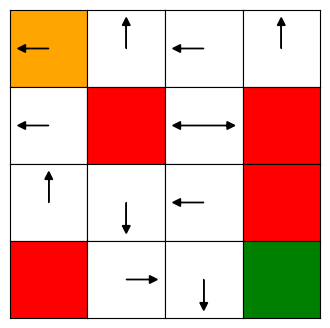

----------------------------------------------
You took an average of 43 steps to get the frisbee
And you fell in the hole 21.55 % of the times
----------------------------------------------


In [12]:
discountRate=0.9
stateNumber=16
actionNumber=4

maxNumberOfIterationsOfPolicyIteration=3000
initialPolicy=(1/actionNumber)*np.ones((stateNumber,actionNumber))
valueFunctionVectorInitial=np.zeros(env.observation_space.n)
maxNumberOfIterationsOfIterativePolicyEvaluation=1000
convergenceToleranceIterativePolicyEvaluation=10**(-6)
currentPolicy=initialPolicy
valueFunctionVectorComputed =evaluatePolicy(env,valueFunctionVectorInitial,currentPolicy,discountRate,maxNumberOfIterationsOfIterativePolicyEvaluation,convergenceToleranceIterativePolicyEvaluation)
improvedPolicy,qvaluesMatrix=improvePolicy(env,valueFunctionVectorComputed,actionNumber,stateNumber,discountRate)
#print_tex(improvedPolicy)
plot_arrows_on_grid(improvedPolicy>0,4)
get_score(env, improvedPolicy)

# Value Iteration Method

Value iteration method can be viewed as truncated "Policy Iteration Method"

We see that its not necessary for state value to converge and greedy policy can be extracted sooner.

In fact we can stop searching for improved policy as solve instead, only for optimal state values.

## Bellman's optimality equation

Or in terms of Bellman's optimality equation

$$v_{\ast}^{k+1}(s) = \underset{a \in A}{\mathrm{max}} \ q_{\ast}(s,a) = \underset{a \in A}{\mathrm{max}} \ \sum_{r \in R} \sum_{s^\prime \in S} p(s^\prime, r|s,a) \cdot \biggl[ r + \gamma \cdot v_{\ast}^{k}(s^\prime)\biggr] $$

Algorithm:

<img    src="https://bpb-us-w2.wpmucdn.com/sites.gatech.edu/dist/d/958/files/2020/12/Value_Iteration-1.png" 
        alt="image info" 
        style="background-color:white;padding:0px;" 
        width="400" 
         />



In [13]:
def evaluate_policy_max(state_action_value):
   v_pi =  state_action_value.max(-1)
   return v_pi

def get_q_sa(state_value):
   return (p_sp_sa * (r_sas + gamma*state_value)).sum(-1)


In [14]:
v_pi  = v_pi_init.copy()

for k in range(500):
   v_pi_old   = v_pi.copy()
   v_pi     = evaluate_policy_max(get_q_sa(v_pi_old))

   if np.max(np.abs(v_pi-v_pi_old)) < 1e-5:
         print(f'Policy iter: early break at iter: {k}')
         pi = improve_policy(get_q_sa(v_pi))    # extract maxes + deals with ties
         break
   

Policy iter: early break at iter: 60


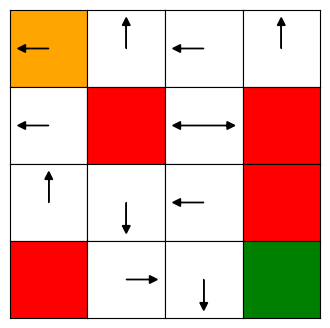

----------------------------------------------
You took an average of 43 steps to get the frisbee
And you fell in the hole 21.92 % of the times
----------------------------------------------


In [15]:
plot_arrows_on_grid(pi>0,4)
get_score(env, pi)